# Deep Neural Network for Image Classification: Cats Vs. Dogs

- Build and apply deep neural network to supervised learning. 


# Packages
Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
from PIL import Image
from scipy import ndimage
import seaborn as sns
import shutil
import glob

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

##  Dataset

We will use the "Dogs vs Cats" dataset from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data)

**Problem Statement**: To write an algorithm to classify whether images contain either a dog or a cat:
  
The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

In [2]:
cat_im = Image.open("data/train/cat.100.jpg")
dog_im = Image.open("data/train/dog.100.jpg")

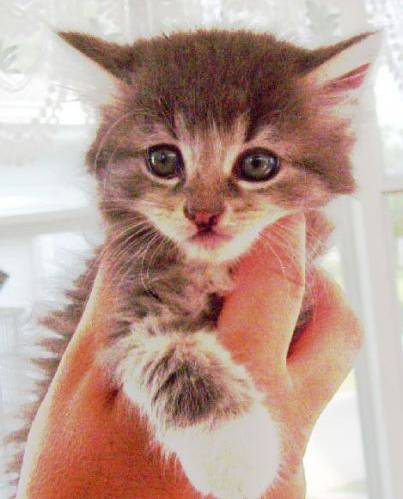

In [3]:
cat_im

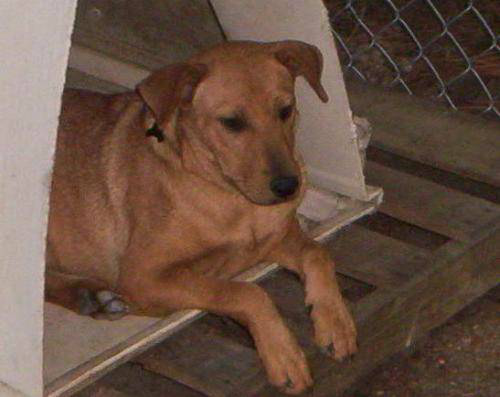

In [4]:
dog_im

In [5]:
print(cat_im.size)
print(dog_im.size)

(403, 499)
(500, 397)


In [6]:
cat_array = np.array(cat_im.getdata())
cat_array.shape

(201097, 3)

### Visualize size of training and test dataset

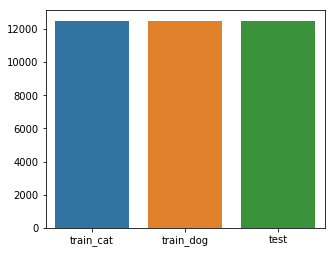

In [7]:
train_filenames = os.listdir('data/train')
train_cat = list(filter(lambda x:x[:3] == 'cat', train_filenames))
train_dog = list(filter(lambda x:x[:3] == 'dog', train_filenames))
x = ['train_cat', 'train_dog', 'test']
y = [len(train_cat), len(train_dog), len(os.listdir('data/test1'))]
ax = sns.barplot(x=x, y=y)

### Resize image

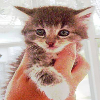

In [8]:
resized_cat = cat_im.resize((100, 100))
resized_cat

In [9]:
resized_cat.size

(100, 100)

In [10]:
resized_cat_array = np.array(resized_cat.getdata())
resized_cat_array.shape

(10000, 3)

In [11]:
cat_files = glob.glob("data/train/cat*")
dog_files = glob.glob("data/train/dog*")
cat_list = []
for i in cat_files[:10]:
    cat_list.append( np.array(plt.imread(i)))
dog_list = []
for i in dog_files[:10]:
    dog_list.append(np.array(plt.imread(i)))

In [12]:
# labeling cats =='0' and dogs== '0'
y_cat = np.zeros(len(cat_list))
y_dog = np.ones(len(dog_list))
y = np.concatenate([y_cat, y_dog])
y = y.astype("int")
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
X = np.concatenate([cat_list, dog_list])
X[:1]

array([ array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ..., 
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ..., 
        [241, 202, 123],
        [240, 201, 122],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ..., 
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ..., 
       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ..., 
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ..., 
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [151, 120,  53],
        ..., 
        [  1,   1,   0],
        [  1,   1,   0],
        [ 

In [14]:
X.shape

(20,)

In [15]:
y.shape

(20,)